In [1]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict

# Read the data

In [2]:
# load the dataset and show first 10 records
data_set = pd.read_csv('D:/banking.csv')
data_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
# describe summary
data_set.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# Handling missing values

In [4]:
# check if there are null values
data_set.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [5]:
data_set = data_set.drop(columns="duration")
data_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Handling outliers

<AxesSubplot:>

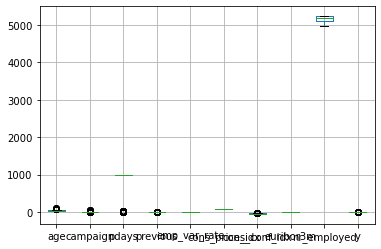

In [6]:
# check the outliers
# show boxplots for each feature
data_set.boxplot()

In [7]:
# get the numerical columns from the dataset
numerical_df = data_set.select_dtypes(include=np.number)
numerical_df = numerical_df.drop(columns = "y")

In [8]:
# get the information about numerical columns
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   campaign        41188 non-null  int64  
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp_var_rate    41188 non-null  float64
 5   cons_price_idx  41188 non-null  float64
 6   cons_conf_idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr_employed     41188 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.8 MB


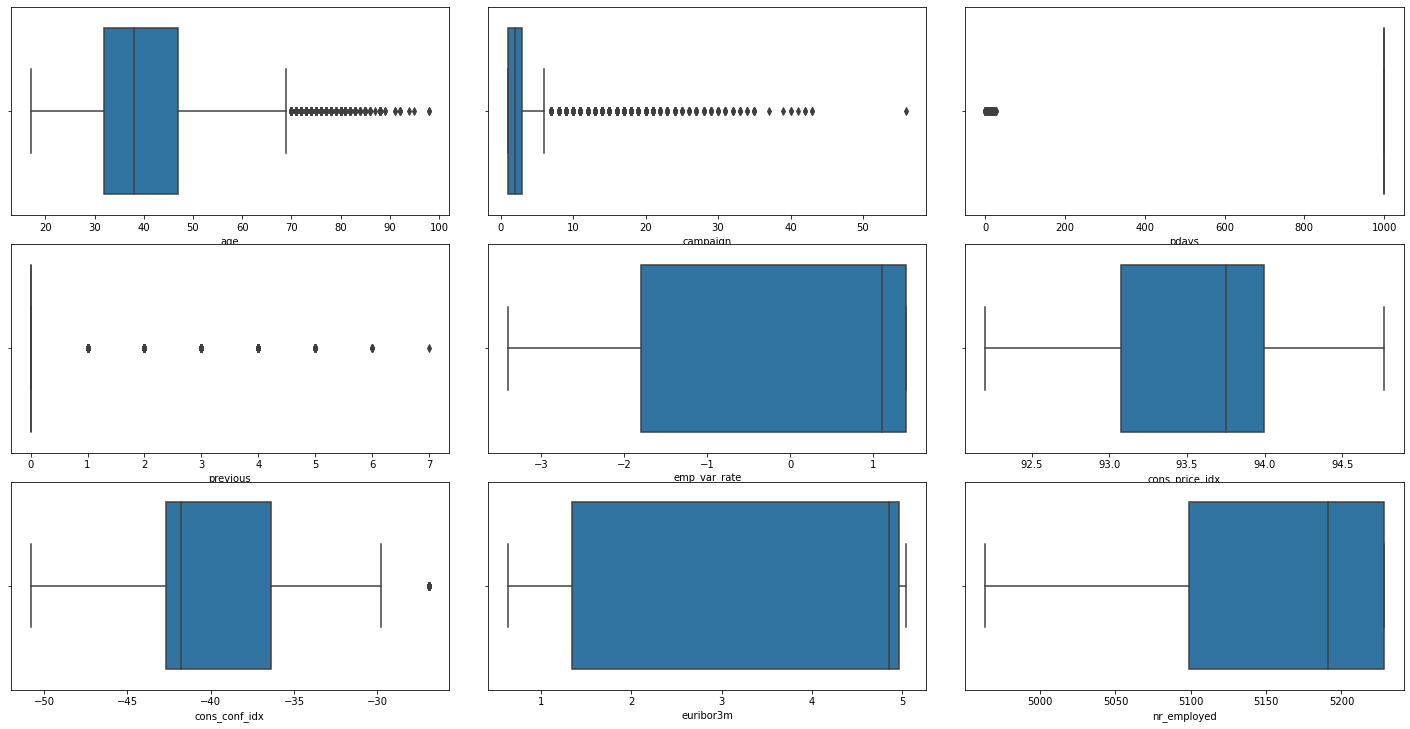

In [9]:
# check outliers
import warnings
warnings.filterwarnings("ignore")

# draw boxplots for all features
fig, axes = plt.subplots(3,3,figsize=(20,10))
plt.tight_layout(0.8)
sns.boxplot(numerical_df['age'],orient = 'v',ax = axes[0,0])
sns.boxplot(numerical_df['campaign'],orient = 'v',ax = axes[0,1])
sns.boxplot(numerical_df['pdays'],orient = 'v',ax = axes[0,2])
sns.boxplot(numerical_df['previous'],orient = 'v',ax = axes[1,0])
sns.boxplot(numerical_df['emp_var_rate'],orient = 'v',ax = axes[1,1])
sns.boxplot(numerical_df['cons_price_idx'],orient = 'v',ax = axes[1,2])
sns.boxplot(numerical_df['cons_conf_idx'],orient = 'v',ax = axes[2,0])
sns.boxplot(numerical_df['euribor3m'],orient = 'v',ax = axes[2,1])
sns.boxplot(numerical_df['nr_employed'],orient = 'v',ax = axes[2,2])
plt.show()

In [10]:
len(numerical_df[numerical_df['campaign'] > 50])


1

<AxesSubplot:xlabel='campaign'>

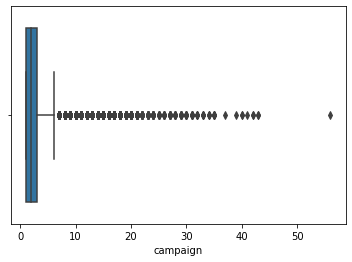

In [11]:
# before removing outlier
sns.boxplot(numerical_df['campaign'],orient = 'v')

In [12]:
numerical_df.shape

(41188, 9)

In [13]:
data_set.drop(data_set[data_set['campaign'] > 50].index, inplace = True)
data_set = data_set.reset_index(drop=True)
target = data_set.loc[:, data_set.columns == 'y']
X = data_set.drop(columns = "y")
numerical_df = X.select_dtypes(include=np.number)
numerical_df.shape

(41187, 9)

<AxesSubplot:xlabel='campaign'>

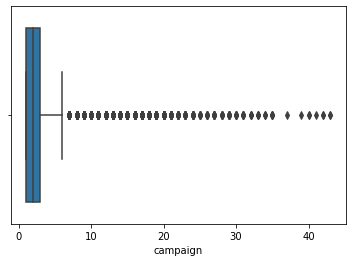

In [14]:
# after removing outlier
sns.boxplot(numerical_df['campaign'],orient = 'v')

# Data transformation

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>],
       [<AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr_employed'}>]], dtype=object)

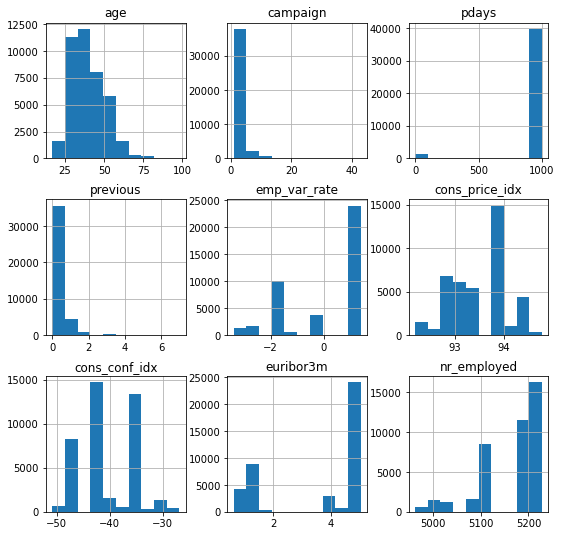

In [15]:
# draw histodrams
numerical_df.hist(figsize=(9,9))

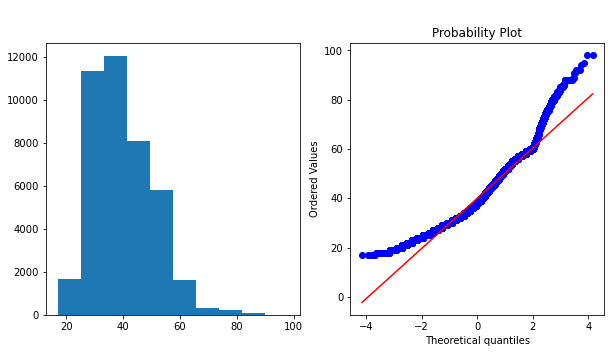

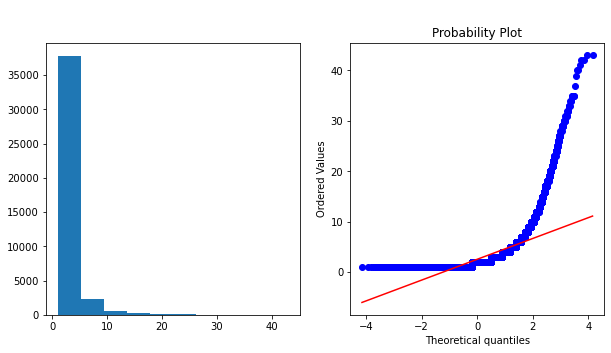

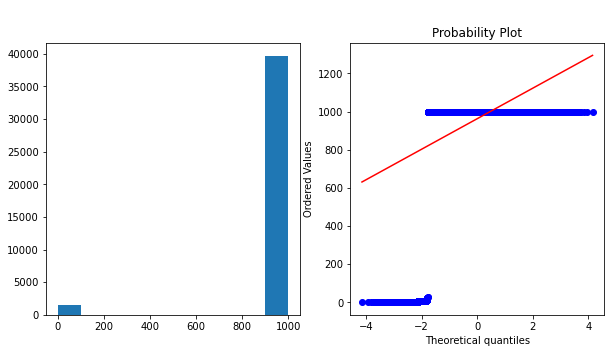

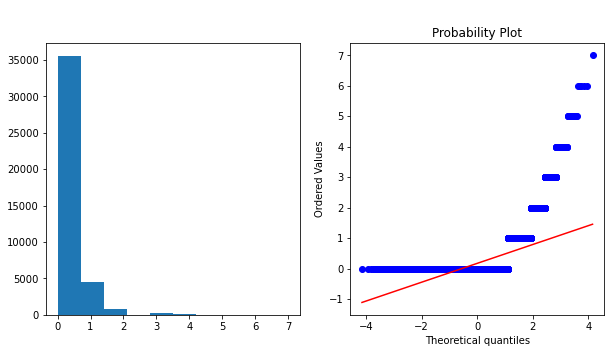

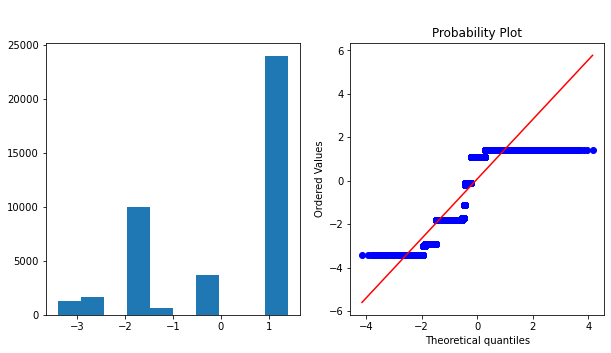

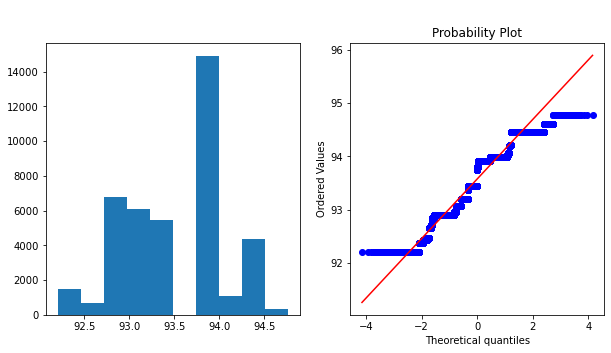

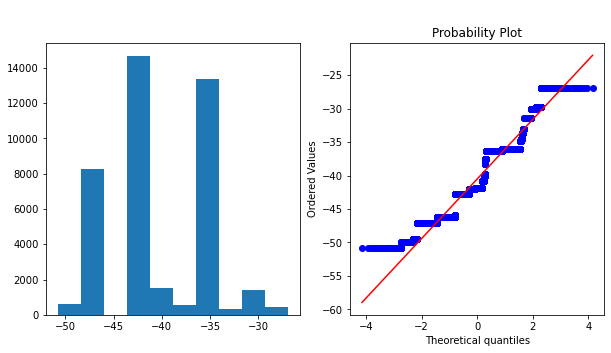

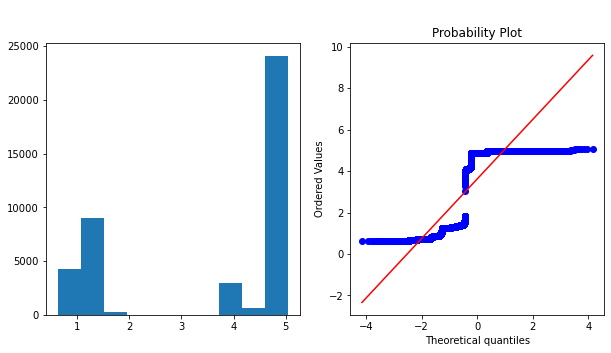

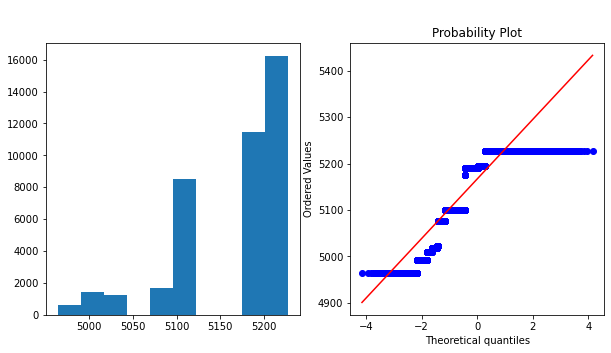

In [16]:
# draw histograms and Q-Q plots for all features
cols = numerical_df.columns
for col in cols:
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    fig.suptitle(col.capitalize(), fontsize=20, color='white')
    axes[0].hist(numerical_df[col])
    stats.probplot(numerical_df[col], dist="norm", plot=axes[1])
    plt.show()

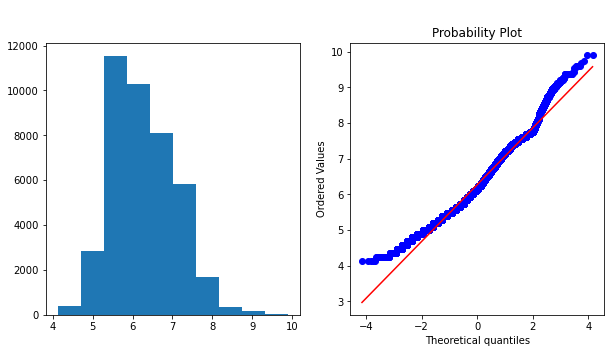

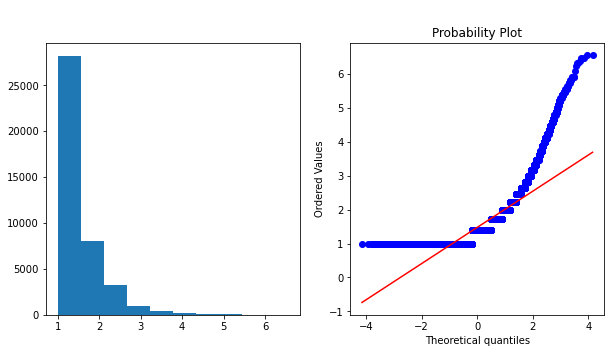

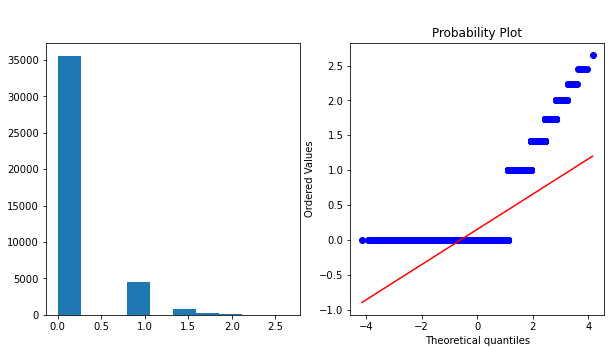

In [17]:
# do the transformations for right skewed features
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

columns_to_sqrt = ['age', 'campaign', 'previous']
data = sqrt_transformer.transform(numerical_df[columns_to_sqrt])
# draw the histograms and Q-Q plots after applying transformations
for index, col in enumerate(columns_to_sqrt):
    numerical_df[col] = data[:,index]
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    fig.suptitle(col.capitalize(), fontsize=20, color='white')
    axes[0].hist(numerical_df[col])
    stats.probplot(numerical_df[col], dist="norm", plot=axes[1])
    plt.show()

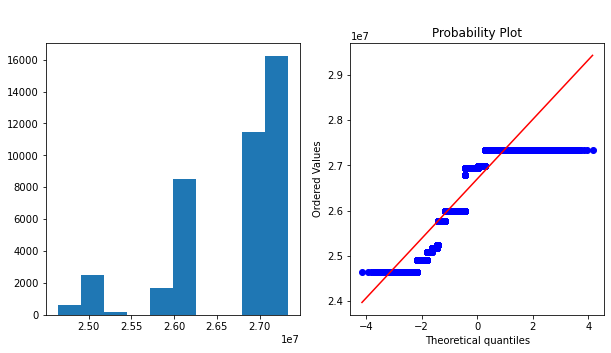

In [18]:
# do the transformations for left skewed features
squared_transformer = FunctionTransformer(lambda x: x**2, validate=True)

columns_to_squared = ['nr_employed']
data = squared_transformer.transform(numerical_df[columns_to_squared])
# draw the histograms and Q-Q plots after applying transformations
for index, col in enumerate(columns_to_squared):
    numerical_df[col] = data[:,index]
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    fig.suptitle(col.capitalize(), fontsize=20, color='white')
    axes[0].hist(numerical_df[col])
    stats.probplot(numerical_df[col], dist="norm", plot=axes[1])
    plt.show()

# Coding

In [19]:
# identify the categorical columns
cat_df = data_set.select_dtypes(exclude=np.number)
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41187 entries, 0 to 41186
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41187 non-null  object
 1   marital      41187 non-null  object
 2   education    41187 non-null  object
 3   default      41187 non-null  object
 4   housing      41187 non-null  object
 5   loan         41187 non-null  object
 6   contact      41187 non-null  object
 7   month        41187 non-null  object
 8   day_of_week  41187 non-null  object
 9   poutcome     41187 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB


In [20]:
cat_df['job'] = cat_df['job'].astype('category').cat.codes
cat_df['marital'] = cat_df['marital'].astype('category').cat.codes
cat_df['education'] = cat_df['education'].astype('category').cat.codes
cat_df['default'] = cat_df['default'].astype('category').cat.codes
cat_df['housing'] = cat_df['housing'].astype('category').cat.codes
cat_df['loan'] = cat_df['loan'].astype('category').cat.codes
cat_df['contact'] = cat_df['contact'].astype('category').cat.codes
cat_df['month'] = cat_df['month'].astype('category').cat.codes
cat_df['day_of_week'] = cat_df['day_of_week'].astype('category').cat.codes
cat_df['poutcome'] = cat_df['poutcome'].astype('category').cat.codes
cat_df.info()
cat_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41187 entries, 0 to 41186
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   job          41187 non-null  int8 
 1   marital      41187 non-null  int8 
 2   education    41187 non-null  int8 
 3   default      41187 non-null  int8 
 4   housing      41187 non-null  int8 
 5   loan         41187 non-null  int8 
 6   contact      41187 non-null  int8 
 7   month        41187 non-null  int8 
 8   day_of_week  41187 non-null  int8 
 9   poutcome     41187 non-null  int8 
dtypes: int8(10)
memory usage: 402.3 KB


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

# Standardization and scaling

In [21]:
# calling the standard scaler
scaler = StandardScaler()
scaler.fit(numerical_df)
#Transformation of other features
train_scaled = scaler.transform(numerical_df)
X_scaled = pd.DataFrame(train_scaled,columns=numerical_df.columns)
X_scaled.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.445054,-0.777848,0.195416,-0.388031,0.839070,-0.227446,0.951286,0.773588,0.849353
1,1.248818,-0.777848,0.195416,-0.388031,-0.115765,-0.648982,-0.323520,0.230472,0.395111
2,-1.222151,0.411124,-5.117278,3.259418,-1.134256,0.828120,0.151832,-1.667551,-2.411444
3,-0.037373,-0.105096,0.195416,-0.388031,-1.197911,-0.864932,-1.425471,-1.277799,-0.947973
4,1.417917,-0.777848,-5.133328,2.191105,-1.898124,-2.374858,1.966810,-1.586833,-1.262340


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>],
       [<AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr_employed'}>]], dtype=object)

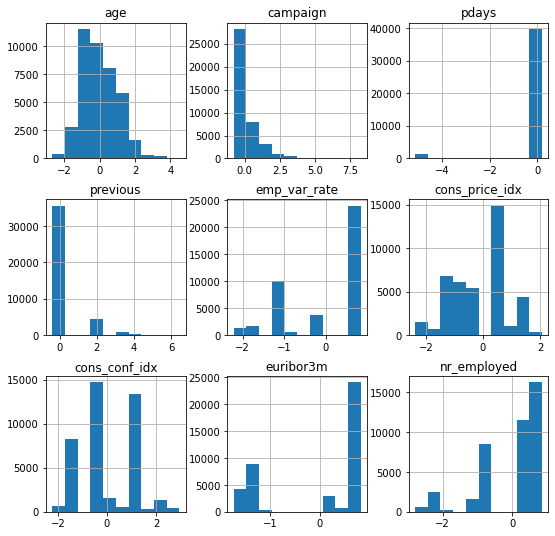

In [22]:
# draw histograms after standardized
X_scaled.hist(figsize=(9,9))

# Feature Engineering

In [23]:
# join the data frames
new_df = X_scaled.join(cat_df)
new_df.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.445054,-0.777848,0.195416,-0.388031,0.839070,-0.227446,0.951286,0.773588,0.849353,1,1,0,1,2,0,0,1,2,1
1,1.248818,-0.777848,0.195416,-0.388031,-0.115765,-0.648982,-0.323520,0.230472,0.395111,9,1,7,0,0,0,0,7,0,1
2,-1.222151,0.411124,-5.117278,3.259418,-1.134256,0.828120,0.151832,-1.667551,-2.411444,4,2,6,0,2,0,0,4,2,2
3,-0.037373,-0.105096,0.195416,-0.388031,-1.197911,-0.864932,-1.425471,-1.277799,-0.947973,7,1,3,0,0,0,0,0,0,1
4,1.417917,-0.777848,-5.133328,2.191105,-1.898124,-2.374858,1.966810,-1.586833,-1.262340,5,1,0,0,2,0,0,1,0,2


,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
age,1.000000,0.005090,-0.022684,0.009761,0.018020,0.009549,0.125409,0.030028,0.004584,-0.005651,-0.402831,-0.115323,0.172736,-0.002549,-0.007338,0.015020,-0.024568,-0.018898,0.017822
campaign,0.005090,1.000000,0.058646,-0.093934,0.159988,0.130888,-0.015865,0.141767,0.153028,-0.007592,-0.009380,0.001196,0.036004,-0.011957,0.008521,0.079840,-0.066436,-0.048936,0.033977
pdays,-0.022684,0.058646,1.000000,-0.552786,0.271003,0.078886,-0.091347,0.296898,0.370987,-0.028463,-0.037940,-0.046632,0.080056,-0.010550,0.000341,0.117967,-0.047895,-0.009527,-0.475620
previous,0.009761,-0.093934,-0.552786,1.000000,-0.464047,-0.267458,-0.078787,-0.488756,-0.512739,0.018029,0.038124,0.034413,-0.106642,0.023963,-0.000474,-0.236415,0.112308,-0.007146,-0.419836
emp_var_rate,0.018020,0.159988,0.271003,-0.464047,1.000000,0.775332,0.196030,0.972244,0.908831,-0.008255,-0.084206,-0.043795,0.203243,-0.060195,0.001835,0.393574,-0.178797,0.033256,0.192970
cons_price_idx,0.009549,0.130888,0.078886,-0.267458,0.775332,1.000000,0.058972,0.688226,0.525285,-0.016000,-0.057472,-0.081627,0.168048,-0.080503,-0.002446,0.591467,-0.004253,0.005656,0.211328
cons_conf_idx,0.125409,-0.015865,-0.091347,-0.078787,0.196030,0.058972,1.000000,0.277675,0.102341,0.052784,-0.033777,0.078778,0.026482,-0.033844,-0.012045,0.251593,0.009635,0.041481,0.178286
euribor3m,0.030028,0.141767,0.296898,-0.488756,0.972244,0.688226,0.277675,1.000000,0.946391,-0.007862,-0.091935,-0.036399,0.195313,-0.059276,0.000109,0.399761,-0.117279,0.039056,0.184142
nr_employed,0.004584,0.153028,0.370987,-0.512739,0.908831,0.525285,0.102341,0.946391,1.000000,-0.019213,-0.086145,-0.040943,0.189723,-0.045952,0.003871,0.268874,-0.222459,0.028555,0.121034
job,-0.005651,-0.007592,-0.028463,0.018029,-0.008255,-0.016000,0.052784,-0.007862,-0.019213,1.000000,0.027891,0.134151,-0.028230,0.006960,-0.010186,-0.025100,-0.033195,-0.000862,0.011509


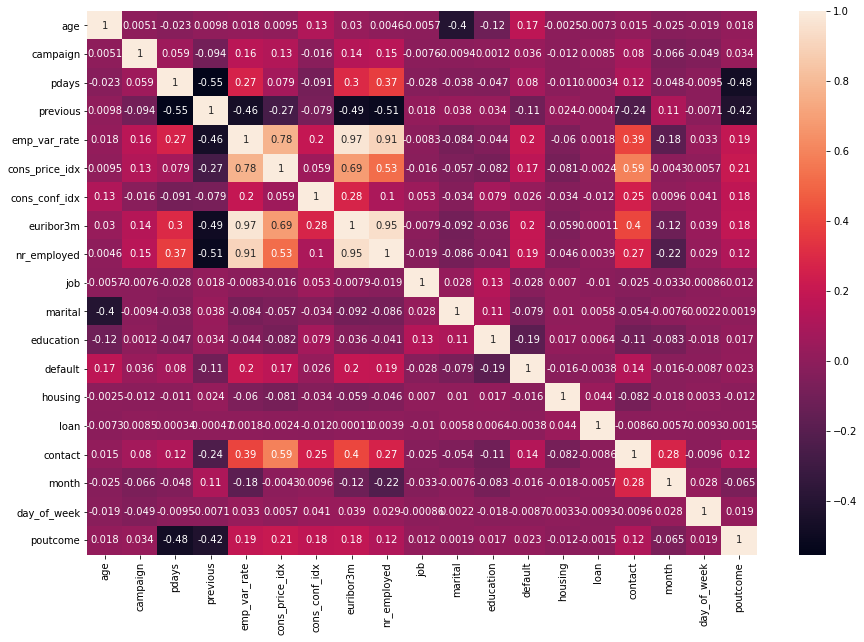

In [24]:
# check the correlation
plt.figure(figsize=(15, 10))
sns.heatmap(new_df.corr(), annot=True)
new_df.corr()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
age,1.000000,0.005090,-0.022684,0.009761,0.018020,0.009549,0.125409,0.030028,0.004584,-0.005651,-0.402831,-0.115323,0.172736,-0.002549,-0.007338,0.015020,-0.024568,-0.018898,0.017822,0.016274
campaign,0.005090,1.000000,0.058646,-0.093934,0.159988,0.130888,-0.015865,0.141767,0.153028,-0.007592,-0.009380,0.001196,0.036004,-0.011957,0.008521,0.079840,-0.066436,-0.048936,0.033977,-0.071140
pdays,-0.022684,0.058646,1.000000,-0.552786,0.271003,0.078886,-0.091347,0.296898,0.370987,-0.028463,-0.037940,-0.046632,0.080056,-0.010550,0.000341,0.117967,-0.047895,-0.009527,-0.475620,-0.324913
previous,0.009761,-0.093934,-0.552786,1.000000,-0.464047,-0.267458,-0.078787,-0.488756,-0.512739,0.018029,0.038124,0.034413,-0.106642,0.023963,-0.000474,-0.236415,0.112308,-0.007146,-0.419836,0.217468
emp_var_rate,0.018020,0.159988,0.271003,-0.464047,1.000000,0.775332,0.196030,0.972244,0.908831,-0.008255,-0.084206,-0.043795,0.203243,-0.060195,0.001835,0.393574,-0.178797,0.033256,0.192970,-0.298331
cons_price_idx,0.009549,0.130888,0.078886,-0.267458,0.775332,1.000000,0.058972,0.688226,0.525285,-0.016000,-0.057472,-0.081627,0.168048,-0.080503,-0.002446,0.591467,-0.004253,0.005656,0.211328,-0.136206
cons_conf_idx,0.125409,-0.015865,-0.091347,-0.078787,0.196030,0.058972,1.000000,0.277675,0.102341,0.052784,-0.033777,0.078778,0.026482,-0.033844,-0.012045,0.251593,0.009635,0.041481,0.178286,0.054886
euribor3m,0.030028,0.141767,0.296898,-0.488756,0.972244,0.688226,0.277675,1.000000,0.946391,-0.007862,-0.091935,-0.036399,0.195313,-0.059276,0.000109,0.399761,-0.117279,0.039056,0.184142,-0.307768
nr_employed,0.004584,0.153028,0.370987,-0.512739,0.908831,0.525285,0.102341,0.946391,1.000000,-0.019213,-0.086145,-0.040943,0.189723,-0.045952,0.003871,0.268874,-0.222459,0.028555,0.121034,-0.353614
job,-0.005651,-0.007592,-0.028463,0.018029,-0.008255,-0.016000,0.052784,-0.007862,-0.019213,1.000000,0.027891,0.134151,-0.028230,0.006960,-0.010186,-0.025100,-0.033195,-0.000862,0.011509,0.025114


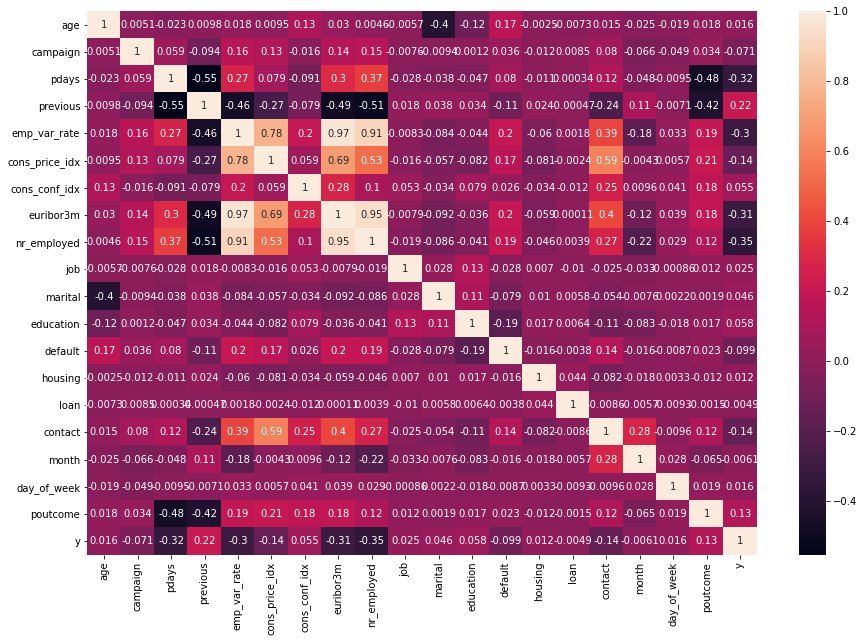

In [25]:
# test the significance of the features
data = new_df.copy()
data['y'] = target
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
data.corr()

# Principal Component Analysis

In [26]:
# apply the PCA for feature reduction
pca = PCA()
pca.fit(new_df)
pca.explained_variance_ratio_

array([3.60823168e-01, 1.58698688e-01, 1.25996686e-01, 9.96013812e-02,
       5.40876942e-02, 3.64695406e-02, 3.03958549e-02, 2.68564602e-02,
       2.65534383e-02, 2.36147387e-02, 1.43913920e-02, 1.43594582e-02,
       1.21767205e-02, 7.79406351e-03, 4.10683463e-03, 3.03977450e-03,
       5.52543044e-04, 2.87598556e-04, 1.93964118e-04])

In [27]:
# apply the PCA for feature reduction

pca=PCA(n_components=9)
X_pca = pca.fit_transform(new_df) 
pcaDf = pd.DataFrame(data = X_pca)

print("explained_variance_ratio ",pca.explained_variance_ratio_)
pcaDf.head(10)

explained_variance_ratio  [0.36082317 0.15869869 0.12599669 0.09960138 0.05408769 0.03646954
 0.03039585 0.02685646 0.02655344]


,0,1,2,3,4,5,6,7,8
0,-3.026784,-2.791963,-3.744682,1.577775,-0.186396,0.517146,-0.845459,-0.591428,-1.294457
1,5.506583,2.071442,2.380228,-2.050714,2.075060,-0.051940,-1.390779,-0.657010,0.897343
2,0.670530,0.813126,3.969817,2.689670,-0.391013,3.914249,3.698532,0.759262,-1.192414
3,3.324888,-2.954738,-0.457781,3.734927,1.902206,-1.110123,0.006854,-0.533379,1.249643
4,1.077468,-0.615695,-1.442740,6.773565,1.331474,4.785648,-0.167801,-0.302579,-1.437973
5,-0.169388,-0.931190,-4.142012,0.501201,-0.795949,-0.618137,1.245899,1.953183,-0.206290
6,-3.229069,2.904895,-1.963357,2.625480,0.018862,-1.550077,-0.318646,-0.119335,-0.830396
7,-2.987116,2.447664,-0.196362,1.952215,2.006840,-1.274435,-0.773165,-0.049673,-0.802956
8,-3.307183,0.507238,4.409822,2.805280,0.533489,3.635299,1.956041,-0.870510,0.348262
9,-2.962850,-2.342108,-1.934349,5.408290,-0.212508,-0.996431,1.785159,0.044120,-0.829520


In [28]:
X_df=pcaDf

X_train, X_test, y_train, y_test = train_test_split(X_df, target, test_size=0.2,random_state=100)
y_test.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)

print("X_train shape:",X_train.shape,"    y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape,"     y_test shape:", y_test.shape)

X_train shape: (32949, 9)     y_train shape: (32949, 1)
X_test shape: (8238, 9)      y_test shape: (8238, 1)


# SMOTE

<AxesSubplot:xlabel='y', ylabel='count'>

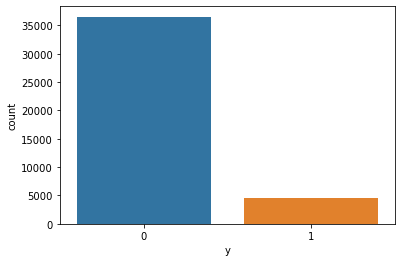

In [29]:
sns.countplot(data_set['y'])

In [30]:
smote = SMOTE(random_state = 100)
X, y = smote.fit_resample(X_train, y_train)
# df_oversampler = pd.DataFrame(X)
# df_oversampler['y'] = y
X_train = X
y_train = y

y_train.head()

,y
0,0
1,0
2,0
3,1
4,0


# Support Vector Machines

In [31]:
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter     2 Dimensions
svc = svm.SVC(kernel='rbf', C=10, gamma=0.5).fit(X_train, y_train)

#gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

In [32]:
y_predicted = svc.predict(X_test)

In [33]:
# Check the performance
print('Accuracy:',accuracy_score(y_test, y_predicted))
print("Test set score: %f" % accuracy_score(y_test, y_test))
print("MSE:",mean_squared_error(y_test, y_predicted))

Accuracy: 0.801650886137412
Test set score: 1.000000
MSE: 0.198349113862588


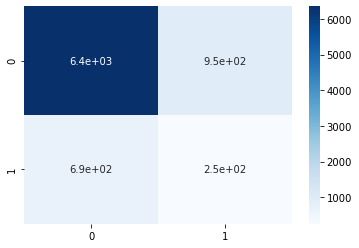

In [34]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()

In [35]:
# compare actual values and predicted values
yh = pd.DataFrame(y_predicted,columns=["predicted Y"])
new_df = y_test.join(yh)
new_df.head(10)

,y,predicted Y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


In [36]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7298
           1       0.21      0.27      0.24       940

    accuracy                           0.80      8238
   macro avg       0.56      0.57      0.56      8238
weighted avg       0.82      0.80      0.81      8238

